## Train ENet

### Tensorboard

In [ ]:
import os
folder_path = ROOT_DIR + "/train"
os.chdir(folder_path)

%load_ext tensorboard
%tensorboard --logdir "{folder_path}/runs/enet"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


<IPython.core.display.Javascript object>

### Train curves (tensorboard)

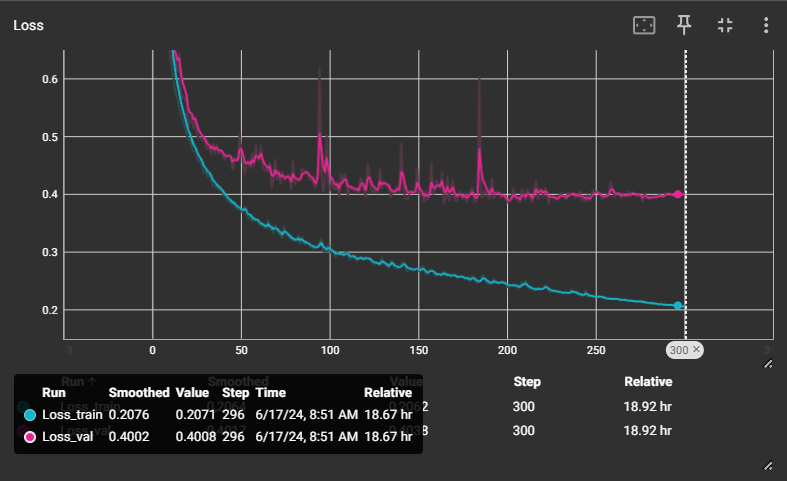

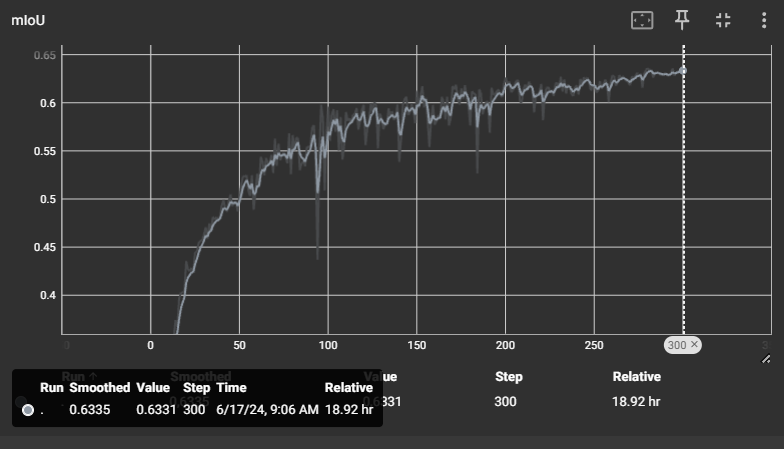

In [ ]:
import os
folder_path = ROOT_DIR + "/train"
os.chdir(folder_path)

%run train/main.py --savedir enet_train_cityscape_void \
 --datadir '{ROOT_DIR}/datasets/Train_Dataset' \
 --num-epochs 300 \
 --model enet \
 --batch-size 8
# --resume


========== ENET TRAINING ===========
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/train
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val
<class '__main__.CrossEntropyLoss2d'>
----- TRAINING - EPOCH 1 -----
LEARNING RATE:  0.000501499750305022


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


loss: 3.055 (epoch: 1, step: 0) // Avg time/img: 0.1320 s
loss: 2.7 (epoch: 1, step: 50) // Avg time/img: 0.0591 s
loss: 2.416 (epoch: 1, step: 100) // Avg time/img: 0.0587 s
loss: 2.183 (epoch: 1, step: 150) // Avg time/img: 0.0584 s
loss: 2.022 (epoch: 1, step: 200) // Avg time/img: 0.0584 s
loss: 1.909 (epoch: 1, step: 250) // Avg time/img: 0.0584 s
loss: 1.803 (epoch: 1, step: 300) // Avg time/img: 0.0583 s
loss: 1.722 (epoch: 1, step: 350) // Avg time/img: 0.0583 s
----- VALIDATING - EPOCH 1 -----


/usr/local/lib/python3.10/dist-packages/torch/optim/lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)
/content/drive/MyDrive/ProjectAML/train/main.py:339: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  inputs = Variable(images, volatile=True)    #volatile flag makes it free backward or outputs for eval
/content/drive/MyDrive/ProjectAML/train/main.py:340: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  targets = Variable(labels, volatile=True)


Output streaming troncato alle ultime 5000 righe.
VAL loss: 0.4654 (epoch: 75, step: 200) // Avg time/img: 0.0041 s
VAL loss: 0.4629 (epoch: 75, step: 250) // Avg time/img: 0.0040 s
VAL loss: 0.4699 (epoch: 75, step: 300) // Avg time/img: 0.0040 s
VAL loss: 0.481 (epoch: 75, step: 350) // Avg time/img: 0.0041 s
VAL loss: 0.458 (epoch: 75, step: 400) // Avg time/img: 0.0040 s
VAL loss: 0.4341 (epoch: 75, step: 450) // Avg time/img: 0.0040 s
EPOCH IoU on VAL set:  54.84 %
----- TRAINING - EPOCH 76 -----
LEARNING RATE:  0.0003874881898709925
loss: 0.3388 (epoch: 76, step: 0) // Avg time/img: 0.0659 s
loss: 0.3341 (epoch: 76, step: 50) // Avg time/img: 0.0600 s
loss: 0.3262 (epoch: 76, step: 100) // Avg time/img: 0.0596 s
loss: 0.3274 (epoch: 76, step: 150) // Avg time/img: 0.0593 s
loss: 0.3288 (epoch: 76, step: 200) // Avg time/img: 0.0593 s
loss: 0.3283 (epoch: 76, step: 250) // Avg time/img: 0.0592 s
loss: 0.3283 (epoch: 76, step: 300) // Avg time/img: 0.0592 s
loss: 0.3285 (epoch: 76,

ENet paper
```
@misc{paszke2016enet,
      title={ENet: A Deep Neural Network Architecture for Real-Time Semantic Segmentation},
      author={Adam Paszke and Abhishek Chaurasia and Sangpil Kim and Eugenio Culurciello},
      year={2016},
      eprint={1606.02147},
      archivePrefix={arXiv},
      primaryClass={cs.CV}
}
```

## 3.b) Test ENet

 ### **Eval IoU of ENet on cityscape VAL**

In [ ]:
import os
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

%run eval_iou.py --datadir '{ROOT_DIR}/datasets/Train_Dataset' --loadDir '{ROOT_DIR}/save/enet_train_cityscape_void/' --loadWeights 'model_best.pth' \
     --void --loadModel 'enet.py' --no-resize

%run eval_iou.py --datadir '{ROOT_DIR}/datasets/Train_Dataset' --loadDir '{ROOT_DIR}/save/enet_train_cityscape_void/' --loadWeights 'model_best.pth' \
     --void --loadModel 'enet.py'

Loading model: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val /content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/gtFine/val


  0%|          | 0/500 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
100%|██████████| 500/500 [02:24<00:00,  3.46it/s]


---------------------------------------
Took  144.69614338874817 seconds
Per-Class IoU:
79.85 Road
58.01 sidewalk
77.26 building
22.38 wall
24.41 fence
46.94 pole
23.18 traffic light
48.55 traffic sign
82.07 vegetation
45.24 terrain
82.29 sky
53.48 person
28.84 rider
75.89 car
15.07 truck
23.40 bus
9.43 train
20.48 motorcycle
51.12 bicycle
MEAN IoU:  45.68 %
Loading model: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully
/content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/leftImg8bit/val /content/drive/MyDrive/ProjectAML/datasets/Train_Dataset/gtFine/val


100%|██████████| 500/500 [00:57<00:00,  8.75it/s]

---------------------------------------
Took  57.13272523880005 seconds
Per-Class IoU:
96.06 Road
75.18 sidewalk
88.22 building
46.21 wall
44.07 fence
50.78 pole
50.67 traffic light
61.92 traffic sign
89.76 vegetation
57.02 terrain
91.97 sky
66.83 person
45.28 rider
89.74 car
56.49 truck
65.93 bus
41.14 train
29.35 motorcycle
61.75 bicycle
MEAN IoU:  63.60 %


### **Test on 5 anomaly detection datasets**

In [ ]:
#RUN BENCHMARKS ENet
import os
start = os.getcwd()
folder_path = ROOT_DIR + "/eval"
os.chdir(folder_path)

datasets, formats =  ['RoadAnomaly21', 'RoadObsticle21', 'FS_LostFound_full', 'fs_static', 'RoadAnomaly'], ['png', 'webp', 'png', 'jpg', 'jpg']

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #'cpu' # 'cuda' or 'cpu'
print("run experiments on: "+DEVICE.type)

for resize in [False, True]:
  for anomaly_score in ['MSP']:
    for dataset,format in zip(datasets, formats):

      print(f"dataset:{dataset}, anomaly score:{anomaly_score}, device:{DEVICE}, resize to 512x1024:{resize}")

      command = f"evalAnomaly.py --input {ROOT_DIR}/datasets/Validation_Dataset/{dataset}/images/*.{format} --anomalyScore {anomaly_score} \
                --loadDir {ROOT_DIR}/save/enet_train_cityscape_void/ --loadWeights model_best.pth --void --modelVersion ENet --loadModel enet.py"

      if DEVICE.type == 'cpu':
        command += ' --cpu'
      if resize:
        command += ' --resize'

      %run {command}

run experiments on: cuda
dataset:RoadAnomaly21, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:03<00:00,  3.16it/s]


AUPRC score: 17.711332645181464
FPR@TPR95: 82.83743928171306
dataset:RoadObsticle21, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:19<00:00,  1.51it/s]


AUPRC score: 0.6362342434541286
FPR@TPR95: 72.53297756693257
dataset:FS_LostFound_full, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [01:08<00:00,  1.46it/s]


AUPRC score: 1.3399862909606546
FPR@TPR95: 57.21950650192682
dataset:fs_static, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:18<00:00,  1.65it/s]


AUPRC score: 4.550657373690449
FPR@TPR95: 79.76193402212643
dataset:RoadAnomaly, anomaly score:MSP, device:cuda:0, resize to 512x1024:False
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:18<00:00,  3.31it/s]


AUPRC score: 10.087842155293973
FPR@TPR95: 85.03801445737153
dataset:RoadAnomaly21, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 10/10 [00:02<00:00,  4.62it/s]


AUPRC score: 17.303951035809348
FPR@TPR95: 83.95346717254367
dataset:RoadObsticle21, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:08<00:00,  3.46it/s]


AUPRC score: 1.5030342388225795
FPR@TPR95: 54.138878860345265
dataset:FS_LostFound_full, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 100/100 [00:29<00:00,  3.37it/s]


AUPRC score: 2.9072895704261783
FPR@TPR95: 51.92339265586858
dataset:fs_static, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 30/30 [00:06<00:00,  4.70it/s]


AUPRC score: 7.368776966866204
FPR@TPR95: 56.57657115268344
dataset:RoadAnomaly, anomaly score:MSP, device:cuda:0, resize to 512x1024:True
Loading model: enet.py
Loading weights: /content/drive/MyDrive/ProjectAML/save/enet_train_cityscape_void/model_best.pth
Model and weights LOADED successfully


100%|██████████| 60/60 [00:13<00:00,  4.53it/s]


AUPRC score: 9.686482272646229
FPR@TPR95: 83.08606977749243
